<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_37_frequent_value_imputation/Lecture_37_frequent_value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling Missing Categorical Data | Simple Imputer | Most Frequent Imputation | Missing Category Imp**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [5]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

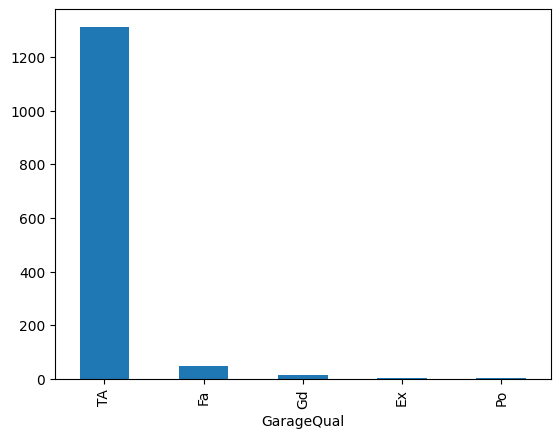

In [6]:
df['GarageQual'].value_counts().plot.bar()

In [7]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

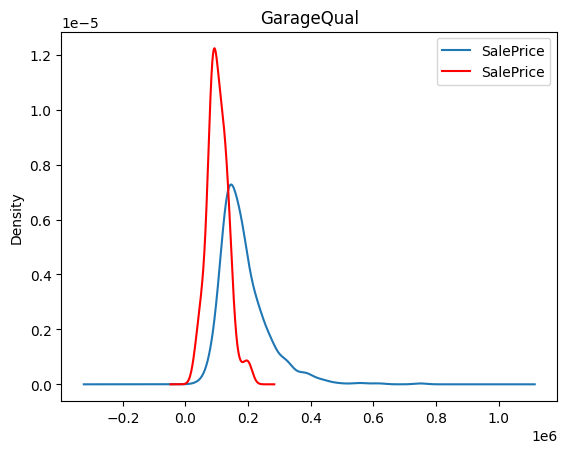

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()

ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [9]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [10]:
df['GarageQual'].fillna('TA',inplace=True)

<ipython-input-10-f3714f1e83eb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

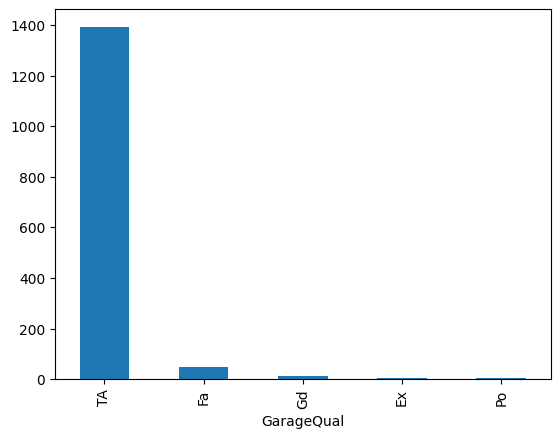

In [11]:
df['GarageQual'].value_counts().plot(kind='bar')

<Axes: xlabel='GarageQual'>

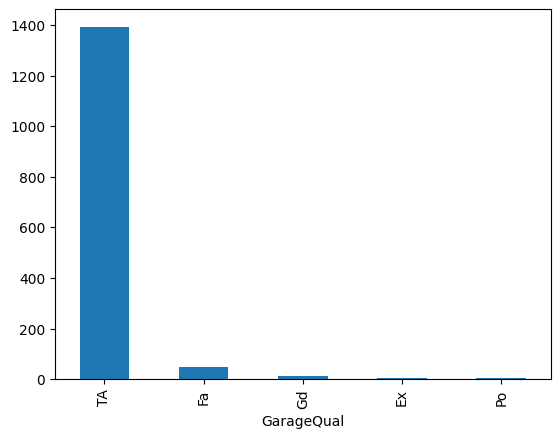

In [12]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

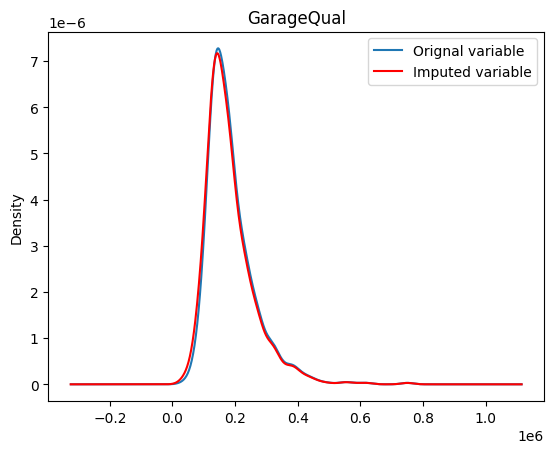

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax =ax)
# distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')



lines,labels=ax.get_legend_handles_labels()
labels = ['Orignal variable','Imputed variable']


ax.legend(lines,labels,loc='best')
# add title
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

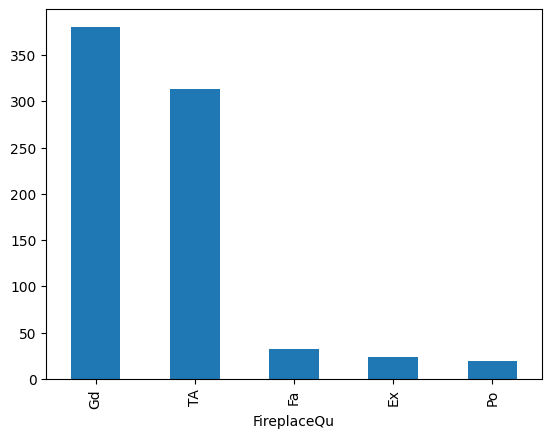

In [14]:
df['FireplaceQu'].value_counts().plot.bar()

In [15]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

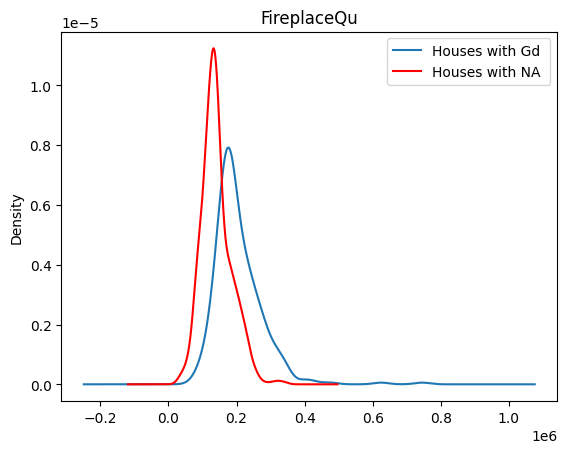

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
labels = ['Houses with Gd','Houses with NA ']

ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [19]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [20]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<Axes: xlabel='FireplaceQu'>

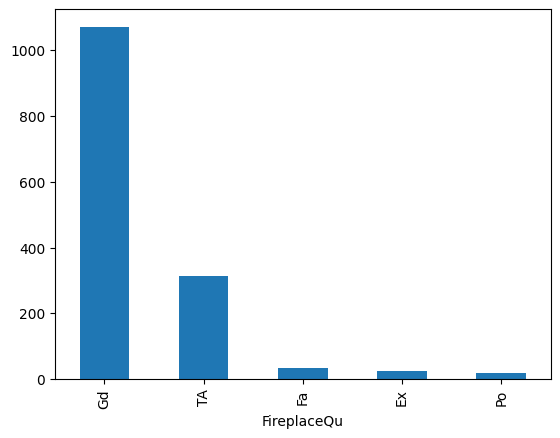

In [21]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

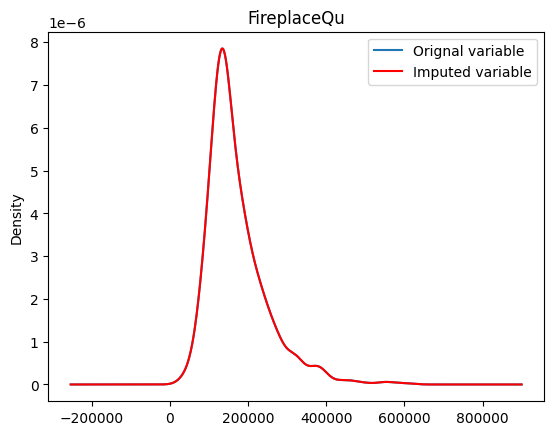

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax =ax)
# distribution of the variable after imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')



lines,labels=ax.get_legend_handles_labels()
labels = ['Orignal variable','Imputed variable']


ax.legend(lines,labels,loc='best')
# add title
plt.title('FireplaceQu')

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [27]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [28]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)